In [ ]:
!pip install ucimlrepo

In [7]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Fetch dataset
bank_marketing = fetch_ucirepo(id=222)
X = bank_marketing.data.features
y = bank_marketing.data.targets.values.ravel()  # flatten target

# Exploratory info
print("Metadata:\n", bank_marketing.metadata)
print("Variable Info:\n", bank_marketing.variables)

# Optional: Combine for easy preview
y = pd.Series(y, name="y")  # convert to Series and name it
dataset = pd.concat([X, y], axis=1)

In [ ]:
# Check nulls
print(dataset.isnull().sum())

# Visualize target distribution
sns.countplot(x='y', data=dataset)
plt.title("Target Class Distribution")
plt.show()

In [ ]:
# Preprocess features
X = pd.get_dummies(X, drop_first=True)  # handle categorical data
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [ ]:
# Split into multiple samples
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [ ]:
# SVM kernel comparison
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best C', 'Best Gamma'])

In [ ]:
def fitnessFunction(kernel, C, gamma, X_train, y_train, X_test, y_test):
    svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [ ]:
# Kernel tuning and search
for i in range(len(samples)):
    best_accuracy = 0
    best_C = 0
    best_gamma = 0
    best_kernel = ''
    X_train, X_test, y_train, y_test = samples[i]

    for kernel in kernels:
        C = np.random.uniform(0.1, 10)
        gamma = np.random.uniform(0.001, 1)
        score = fitnessFunction(kernel, C, gamma, X_train, y_train, X_test, y_test)

        if score > best_accuracy:
            best_accuracy = round(score, 4)
            best_C = round(C, 2)
            best_gamma = round(gamma, 4)
            best_kernel = kernel

    print(f"Sample {i+1}: Best Accuracy = {best_accuracy}, Kernel = {best_kernel}, C = {best_C}, Gamma = {best_gamma}")
    result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]


In [ ]:
# Learning curve for best performing sample
best_index = result['Best Accuracy'].idxmax()
X_train, X_test, y_train, y_test = samples[best_index]

best_model = SVC(
    kernel=result.loc[best_index, 'Best Kernel'],
    C=result.loc[best_index, 'Best C'],
    gamma=result.loc[best_index, 'Best Gamma'],
    max_iter=1000
)

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.01, 1.0, 50)
)

In [ ]:
# Plot learning curve
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.plot(train_sizes, test_mean, label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Best SVM Model')
plt.legend()
plt.grid()
plt.show()

Metadata:
 {'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to pr

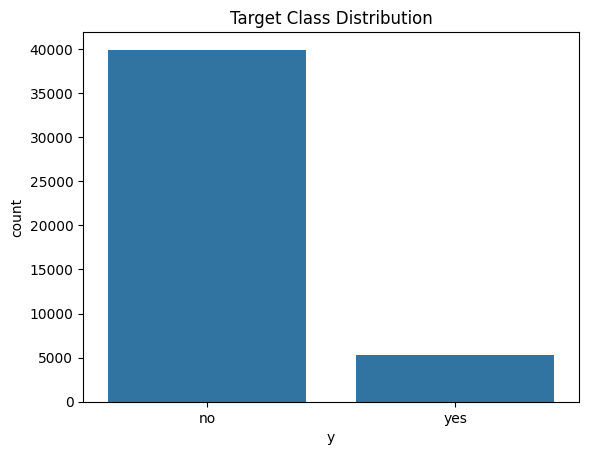

Sample 1: Best Accuracy = 0.8782, Kernel = rbf, C = 3.4, Gamma = 0.1038
Sample 2: Best Accuracy = 0.8763, Kernel = rbf, C = 6.9, Gamma = 0.5741
Sample 3: Best Accuracy = 0.8655, Kernel = rbf, C = 0.26, Gamma = 0.0424
Sample 4: Best Accuracy = 0.8705, Kernel = rbf, C = 7.46, Gamma = 0.8686
Sample 5: Best Accuracy = 0.8814, Kernel = rbf, C = 3.49, Gamma = 0.2201
Sample 6: Best Accuracy = 0.8662, Kernel = rbf, C = 9.47, Gamma = 0.1913
Sample 7: Best Accuracy = 0.8725, Kernel = rbf, C = 1.95, Gamma = 0.5385
Sample 8: Best Accuracy = 0.875, Kernel = rbf, C = 6.78, Gamma = 0.797
Sample 9: Best Accuracy = 0.8708, Kernel = rbf, C = 4.78, Gamma = 0.1783
Sample 10: Best Accuracy = 0.8723, Kernel = rbf, C = 8.07, Gamma = 0.2786


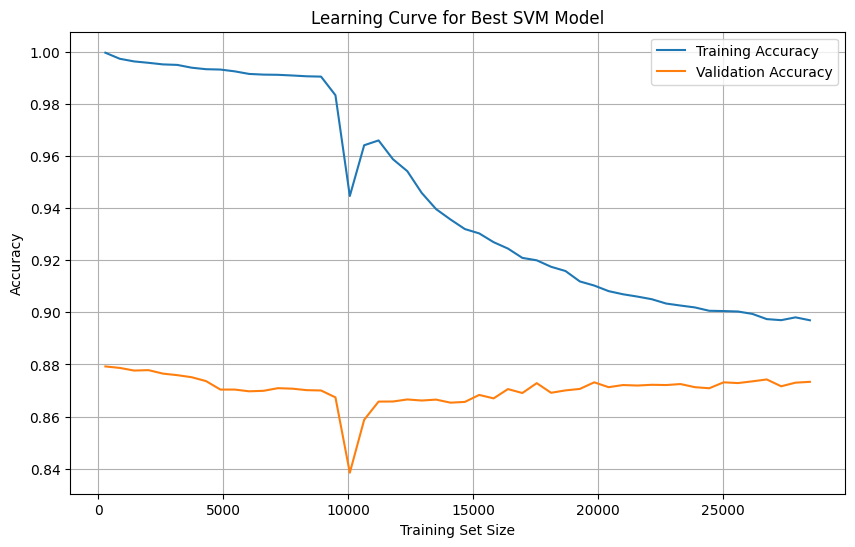

In [6]:
# Install and import ucimlrepo
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Fetch dataset
bank_marketing = fetch_ucirepo(id=222)
X = bank_marketing.data.features
y = bank_marketing.data.targets.values.ravel()  # flatten target

# Exploratory info
print("Metadata:\n", bank_marketing.metadata)
print("Variable Info:\n", bank_marketing.variables)

# Optional: Combine for easy preview
y = pd.Series(y, name="y")  # convert to Series and name it
dataset = pd.concat([X, y], axis=1)


# Check nulls
print(dataset.isnull().sum())

# Visualize target distribution
sns.countplot(x='y', data=dataset)
plt.title("Target Class Distribution")
plt.show()

# Preprocess features
X = pd.get_dummies(X, drop_first=True)  # handle categorical data
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

# Split into multiple samples
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

# SVM kernel comparison
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best C', 'Best Gamma'])

def fitnessFunction(kernel, C, gamma, X_train, y_train, X_test, y_test):
    svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Kernel tuning and search
for i in range(len(samples)):
    best_accuracy = 0
    best_C = 0
    best_gamma = 0
    best_kernel = ''
    X_train, X_test, y_train, y_test = samples[i]

    for kernel in kernels:
        C = np.random.uniform(0.1, 10)
        gamma = np.random.uniform(0.001, 1)
        score = fitnessFunction(kernel, C, gamma, X_train, y_train, X_test, y_test)

        if score > best_accuracy:
            best_accuracy = round(score, 4)
            best_C = round(C, 2)
            best_gamma = round(gamma, 4)
            best_kernel = kernel

    print(f"Sample {i+1}: Best Accuracy = {best_accuracy}, Kernel = {best_kernel}, C = {best_C}, Gamma = {best_gamma}")
    result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

# Learning curve for best performing sample
best_index = result['Best Accuracy'].idxmax()
X_train, X_test, y_train, y_test = samples[best_index]

best_model = SVC(
    kernel=result.loc[best_index, 'Best Kernel'],
    C=result.loc[best_index, 'Best C'],
    gamma=result.loc[best_index, 'Best Gamma'],
    max_iter=1000
)

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.01, 1.0, 50)
)

# Plot learning curve
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.plot(train_sizes, test_mean, label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Best SVM Model')
plt.legend()
plt.grid()
plt.show()
